In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
def aggregate(df):
    filtered_df = df[(df['ds'] != -1) & (df['nsd'] != -1)]
    means = filtered_df.groupby('label_str')[['ds', 'nsd']].mean()
    return means

In [33]:
df = pd.read_csv("/data/core-rad/data/tucker/out/inference_lowres.csv")
means = aggregate(df)
pred_dict_3 = {"dice": means["ds"].to_dict(), "nsd": means["ds"].to_dict()}

In [34]:
df = pd.read_csv("/data/core-rad/data/tucker/out/inference_highres.csv")
means = aggregate(df)
pred_dict_1 = {"dice": means["ds"].to_dict(), "nsd": means["ds"].to_dict()}

In [25]:
with open("data/total_v2.json", 'r') as f:
    ref_dict = json.load(f)

with open("data/total_v1.json", 'r') as f:
    ref_dict1 = json.load(f)

In [31]:
def plot_diff(ref_dict, pred_dict, names=["baseline", "prediction"], entity="dice", title=None):
    ref_dict, pred_dict = ref_dict[entity], pred_dict[entity]
    # Get all unique labels from v2
    all_labels = list(ref_dict.keys())
    
    v1_values = [pred_dict[k] for k in all_labels]
    v2_values = [ref_dict[k] for k in all_labels]
    # Calculate differences
    differences = [v1 - v2 for v1, v2 in zip(v1_values, v2_values)]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(20, 8))  # Adjust the figure size as needed
    bar_width = 0.35
    index = range(len(all_labels))
    
    bars = ax.bar(index, differences, bar_width)
    
    ax.axhline(0, color='black', linewidth=1)  # Center line at zero
    
    ax.set_xlabel('Labels')
    ax.set_ylabel(f'Difference ({names[1]} - {names[0]}) in {entity}')
    if title is None:
        ax.set_title(f'Difference Chart between {names[1]} and {names[0]} Values')
    else:
        ax.set_title(title)
    ax.set_xticks([i for i in index])
    ax.set_xticklabels(all_labels, rotation=90)
    
    plt.tight_layout()
    plt.show()

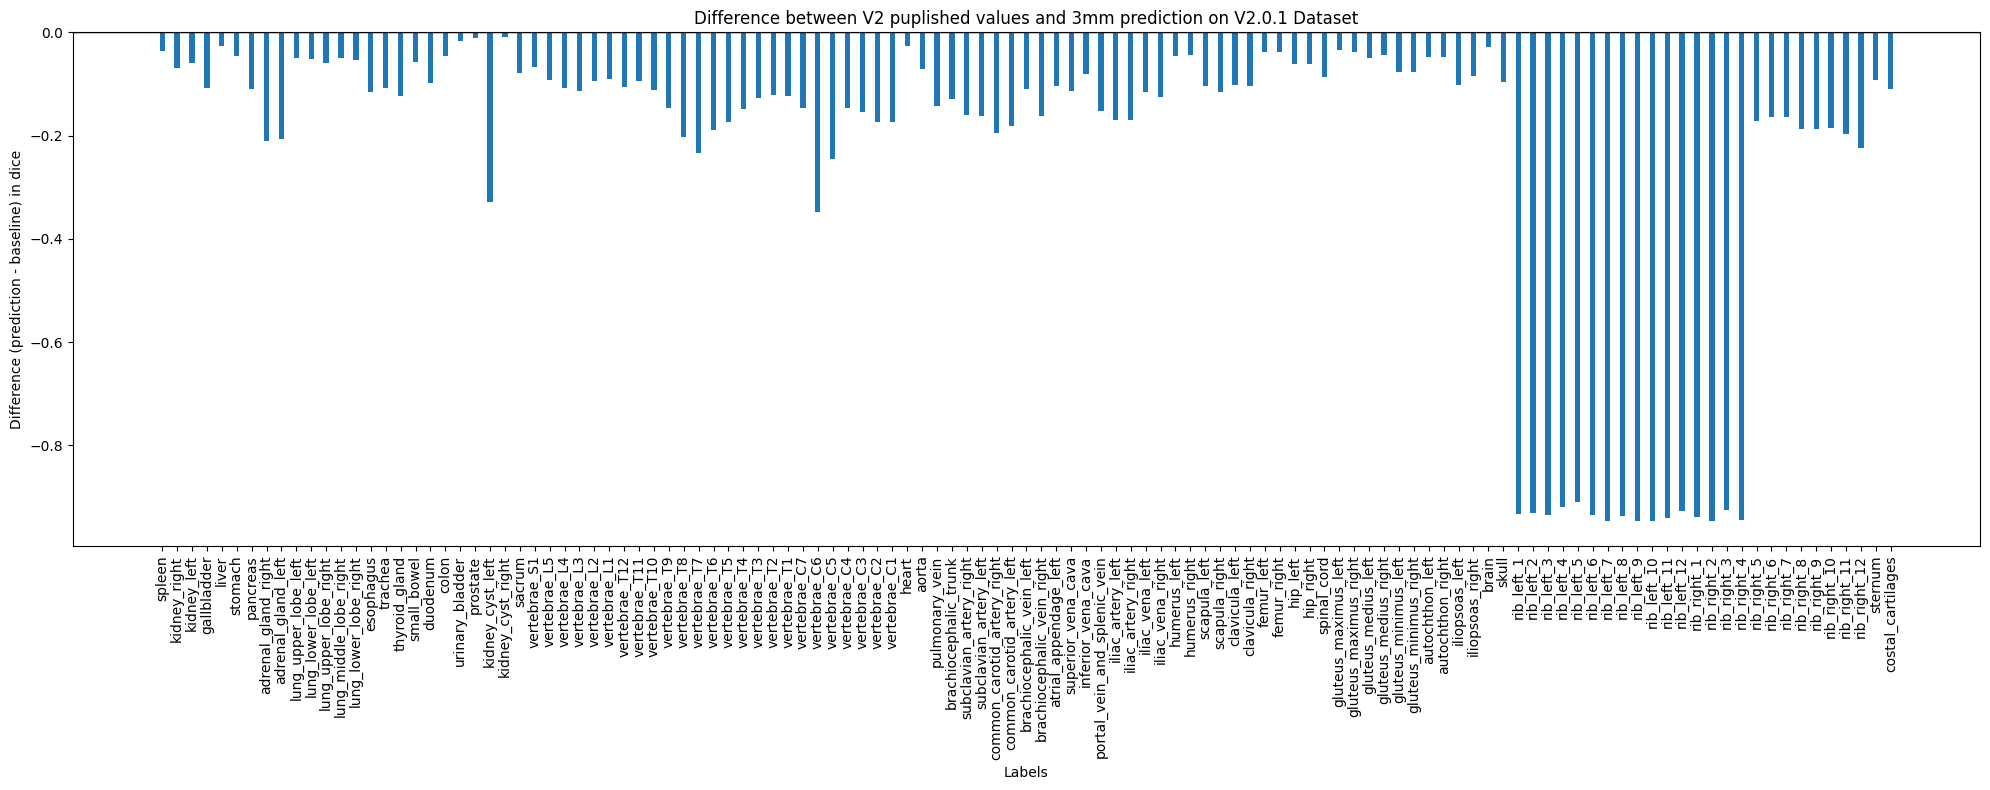

In [32]:
plot_diff(ref_dict, pred_dict_3, title="Difference between V2 puplished values and 3mm prediction on V2.0.1 Dataset")

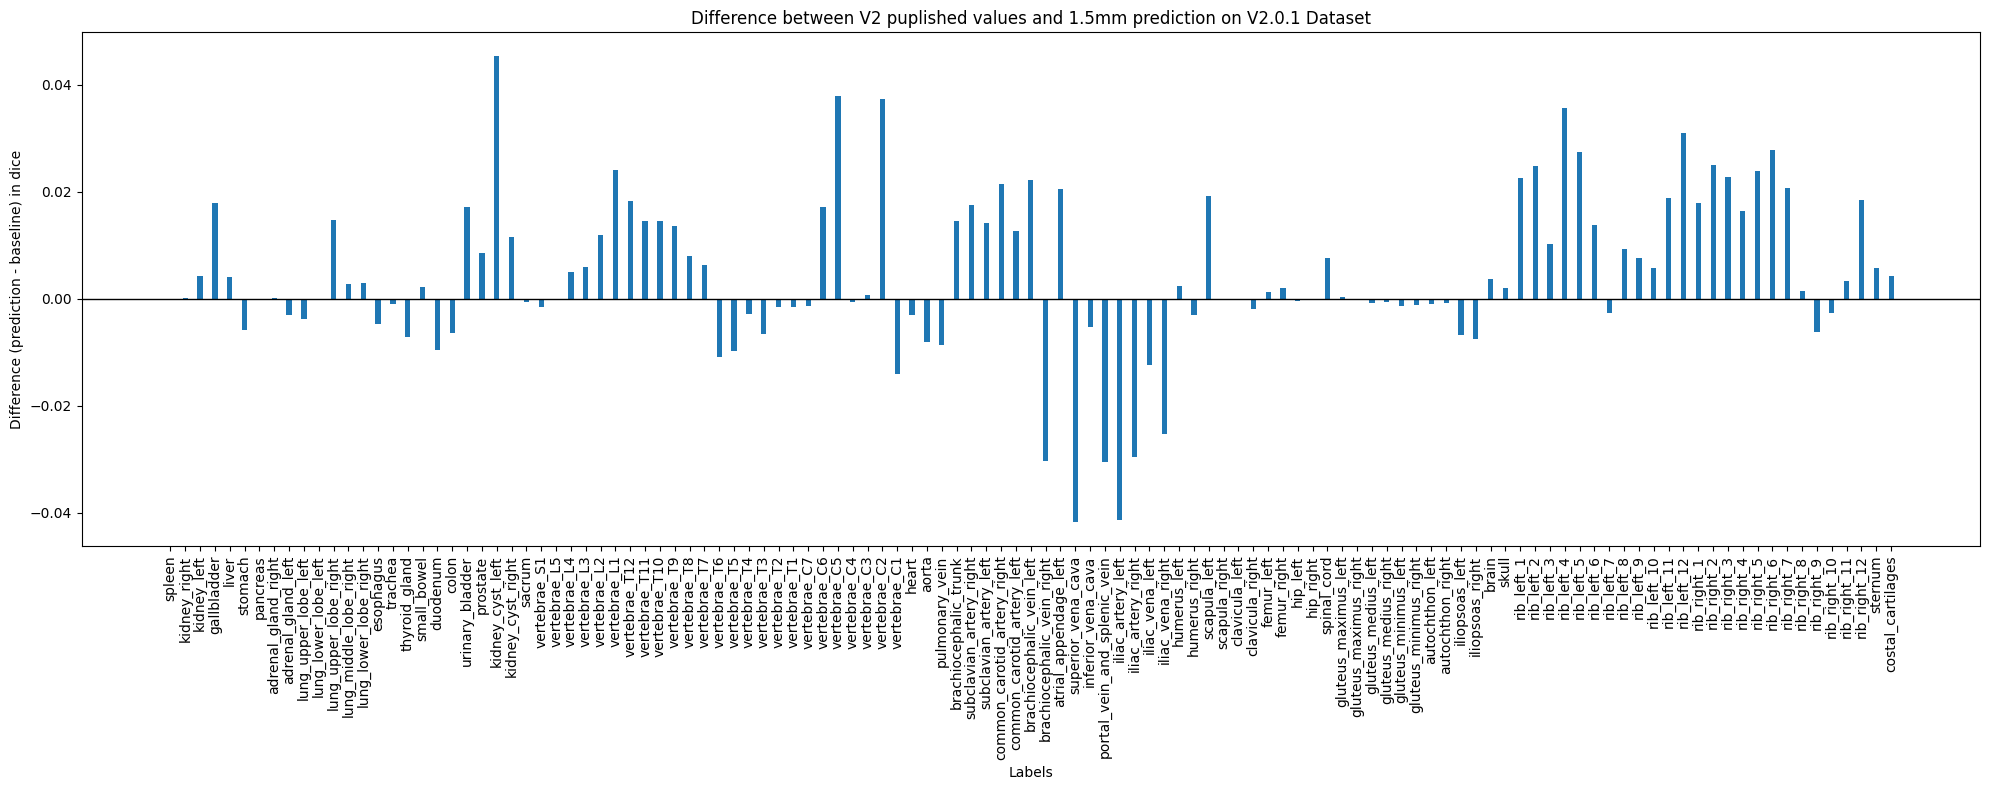

In [35]:
plot_diff(ref_dict, pred_dict_1, title="Difference between V2 puplished values and 1.5mm prediction on V2.0.1 Dataset")

In [27]:
total_v1_2 = {
    "dice": {
        "spleen": 0.983,
        'kidney_right': 0.939,
        'kidney_left': 0.953,
        "gallbladder": 0.875,
        "liver": 0.965,
        "stomach": 0.947,
        "aorta": 0.981,
        "inferior_vena_cava": 0.935,
        "portal_vein_and_splenic_vein": 0.881,
        "pancreas": 0.887,
        'adrenal_gland_right': 0.909,
        'adrenal_gland_left': 0.898,
        'lung_upper_lobe_left': 0.971,
        'lung_lower_lobe_left': 0.985,
        'lung_upper_lobe_right': 0.944,
        'lung_middle_lobe_right': 0.975,
        'lung_lower_lobe_right': 0.988,
        "vertebrae_L5": 0.961,
        "vertebrae_L4": 0.966,
        "vertebrae_L3": 0.959,
        "vertebrae_L2": 0.96,
        "vertebrae_L1": 0.948,
        "vertebrae_T12": 0.944,
        "vertebrae_T11": 0.953,
        "vertebrae_T10": 0.95,
        "vertebrae_T9": 0.959,
        "vertebrae_T8": 0.929,
        "vertebrae_T7": 0.935,
        "vertebrae_T6": 0.961,
        "vertebrae_T5": 0.965,
        "vertebrae_T4": 0.945,
        "vertebrae_T3": 0.958,
        "vertebrae_T2": 0.958,
        "vertebrae_T1": 0.984,
        "vertebrae_C7": 0.975,
        "vertebrae_C6": 0.871,
        "vertebrae_C5": 0.883,
        "vertebrae_C4": 0.89,
        "vertebrae_C3": 0.968,
        "vertebrae_C2": 0.984,
        "vertebrae_C1": 0.894,
        "esophagus": 0.944,
        "trachea": 0.977,
        "brain": 0.969,
        "iliac_artery_left": 0.928,
        "iliac_artery_right": 0.91,
        "iliac_vena_left": 0.929,
        "iliac_vena_right": 0.916,
        "small_bowel": 0.899,
        "duodenum": 0.837,
        "colon": 0.896,
        "rib_left_1": 0.97,
        "rib_left_2": 0.959,
        "rib_left_3": 0.96,
        "rib_left_4": 0.968,
        "rib_left_5": 0.925,
        "rib_left_6": 0.943,
        "rib_left_7": 0.939,
        "rib_left_8": 0.92,
        "rib_left_9": 0.932,
        "rib_left_10": 0.915,
        "rib_left_11": 0.926,
        "rib_left_12": 0.904,
        "rib_right_1": 0.969,
        "rib_right_2": 0.979,
        "rib_right_3": 0.969,
        "rib_right_4": 0.973,
        "rib_right_5": 0.928,
        "rib_right_6": 0.945,
        "rib_right_7": 0.95,
        "rib_right_8": 0.956,
        "rib_right_9": 0.96,
        "rib_right_10": 0.96,
        "rib_right_11": 0.955,
        "rib_right_12": 0.937,
        "humerus_left": 0.899,
        "humerus_right": 0.826,
        "scapula_left": 0.98,
        "scapula_right": 0.954,
        "clavicula_left": 0.96,
        "clavicula_right": 0.981,
        "femur_left": 0.914,
        "femur_right": 0.942,
        "hip_left": 0.968,
        "hip_right": 0.969,
        "sacrum": 0.963,
        "gluteus_maximus_left": 0.958,
        "gluteus_maximus_right": 0.961,
        "gluteus_medius_left": 0.958,
        "gluteus_medius_right": 0.959,
        "gluteus_minimus_left": 0.948,
        "gluteus_minimus_right": 0.952,
        "autochthon_left": 0.965,
        "autochthon_right": 0.964,
        "iliopsoas_left": 0.942,
        "iliopsoas_right": 0.947,
        "urinary_bladder": 0.934
    },
    "normalized_surface_distance": {
        "spleen": 0.985,
        'kidney_right': 0.956,
        'kidney_left': 0.962,
        "gallbladder": 0.958,
        "liver": 0.973,
        "stomach": 0.946,
        "aorta": 0.997,
        "inferior_vena_cava": 0.977,
        "portal_vein_and_splenic_vein": 0.953,
        "pancreas": 0.958,
        'adrenal_gland_right': 0.992,
        'adrenal_gland_left': 0.985,
        'lung_upper_lobe_left': 0.976,
        'lung_lower_lobe_left': 0.985,
        'lung_upper_lobe_right': 0.961,
        'lung_middle_lobe_right': 0.982,
        'lung_lower_lobe_right': 0.994,
        "vertebrae_L5": 0.971,
        "vertebrae_L4": 0.975,
        "vertebrae_L3": 0.973,
        "vertebrae_L2": 0.971,
        "vertebrae_L1": 0.971,
        "vertebrae_T12": 0.953,
        "vertebrae_T11": 0.966,
        "vertebrae_T10": 0.967,
        "vertebrae_T9": 0.969,
        "vertebrae_T8": 0.94,
        "vertebrae_T7": 0.957,
        "vertebrae_T6": 0.979,
        "vertebrae_T5": 0.991,
        "vertebrae_T4": 0.965,
        "vertebrae_T3": 0.974,
        "vertebrae_T2": 0.984,
        "vertebrae_T1": 0.998,
        "vertebrae_C7": 0.998,
        "vertebrae_C6": 0.938,
        "vertebrae_C5": 0.938,
        "vertebrae_C4": 0.921,
        "vertebrae_C3": 0.996,
        "vertebrae_C2": 1.0,
        "vertebrae_C1": 0.924,
        "esophagus": 0.974,
        "trachea": 0.992,
        "brain": 0.981,
        "iliac_artery_left": 0.962,
        "iliac_artery_right": 0.942,
        "iliac_vena_left": 0.964,
        "iliac_vena_right": 0.949,
        "small_bowel": 0.916,
        "duodenum": 0.906,
        "colon": 0.921,
        "rib_left_1": 0.997,
        "rib_left_2": 0.989,
        "rib_left_3": 0.983,
        "rib_left_4": 0.983,
        "rib_left_5": 0.94,
        "rib_left_6": 0.968,
        "rib_left_7": 0.955,
        "rib_left_8": 0.937,
        "rib_left_9": 0.948,
        "rib_left_10": 0.93,
        "rib_left_11": 0.948,
        "rib_left_12": 0.933,
        "rib_right_1": 0.998,
        "rib_right_2": 0.999,
        "rib_right_3": 0.992,
        "rib_right_4": 0.994,
        "rib_right_5": 0.946,
        "rib_right_6": 0.965,
        "rib_right_7": 0.966,
        "rib_right_8": 0.97,
        "rib_right_9": 0.974,
        "rib_right_10": 0.976,
        "rib_right_11": 0.974,
        "rib_right_12": 0.97,
        "humerus_left": 0.946,
        "humerus_right": 0.917,
        "scapula_left": 0.997,
        "scapula_right": 0.975,
        "clavicula_left": 0.972,
        "clavicula_right": 0.999,
        "femur_left": 0.927,
        "femur_right": 0.951,
        "hip_left": 0.977,
        "hip_right": 0.976,
        "sacrum": 0.977,
        "gluteus_maximus_left": 0.97,
        "gluteus_maximus_right": 0.97,
        "gluteus_medius_left": 0.976,
        "gluteus_medius_right": 0.975,
        "gluteus_minimus_left": 0.976,
        "gluteus_minimus_right": 0.976,
        "autochthon_left": 0.984,
        "autochthon_right": 0.982,
        "iliopsoas_left": 0.977,
        "iliopsoas_right": 0.977,
        "urinary_bladder": 0.944
    }
}